In [1]:
from model import *
from AliLoader import *
from ALI_Out import *

from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import manifold
from sklearn import metrics
from scipy import stats
from AliMisc import *

In [4]:

LS = 128 #Latent Space Size
ColorsNumber = 1 #Number of color (always 1 for x-ray)


datadir = "./ChestXray-NIHCC-2/"




#Create all the dataset (training and the testing)
dataloader,train_size,test_size,OtherSet,OtherName = CreateDataset(
    datadir,ExpDir,32,-1,batch_size,ModelDir,TestRatio=0.05,rseed=13)

Wrkdir = ./model/todel3
Train Size = 401 Test Size = 100


In [1]:
#Keep same random seed for image testing  
ConstantZ = torch.randn(9,LS,1,1)
if torch.cuda.is_available():
    ConstantZ = ConstantZ.cuda()
#GenModel
CP = -2 #Checkpoint to load (-2 for latest one, -1 for last epoch)
DisX,DisZ,DisXZ,GenZ,GenX,CP,_,_ = GenModel(32,LS,CP,ExpDir,"todel1",ColorsNumber=ColorsNumber)

NameError: name 'torch' is not defined

In [20]:
def RecLoss(GenX,GenZ,X):
    GenX.eval()
    GenZ.eval()
    Xr = GenX(GenZ(X))
    
    DiffX = Xr - X
    DiffX = DiffX.detach().numpy()
    DiffX = np.power(DiffX,2)
    RecLoss = [np.sqrt(np.mean(x)) for x in DiffX]
    return(RecLoss)


In [21]:
import time

In [22]:
AllRecL = []
AllX = []
AllPath = []
endtime = time.time()
for Xi,path in dataloader:
    inittime = time.time()
    print(inittime-endtime)
    Xn = Xi*2.0 - 1
    Rl = RecLoss(GenX,GenZ,Xn)
    AllRecL += Rl
    AllX += list(Xn.detach().numpy())
    AllPath += list([p.split("/")[-1] for p in path[0]])
    endtime = time.time()


0.0009617805480957031
0.000141143798828125
0.0001437664031982422
0.00015664100646972656
0.00023865699768066406
0.00023889541625976562
0.00013971328735351562
0.00013256072998046875
0.0001323223114013672
0.00012803077697753906
0.00013136863708496094
0.00014543533325195312
0.00012803077697753906
0.0001456737518310547
0.00013566017150878906
0.00012755393981933594
0.00012946128845214844
0.0001857280731201172
0.00013828277587890625
0.00012993812561035156
0.00012564659118652344
0.00022029876708984375
0.00012683868408203125
0.00013208389282226562
0.0001430511474609375
0.0001366138458251953
0.00016450881958007812
0.00015592575073242188
0.00013494491577148438
0.00013971328735351562
0.00012636184692382812
0.0001323223114013672
0.0002448558807373047
0.0002276897430419922
0.0001499652862548828
0.0001308917999267578
0.000244140625
0.00014138221740722656
0.00012803077697753906
0.00023508071899414062


In [10]:
ErrDF = pd.DataFrame([AllPath,AllRecL]).transpose()
ErrDF.columns = ["name","RecLoss"]
print(len(ErrDF))

400


In [11]:
PredDF = pd.read_csv("./model_predictions.csv")
print(len(PredDF))

9552


In [12]:
PredDF[PredDF["name"].isin(ErrDF["name"])]

,name,prediction_0,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,prediction_7,prediction_8,...,label_4,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12,label_13
157,00012053_004.png,0.261787,0.037253,0.178249,0.011728,0.004737,0.003133,0.035451,0.039344,0.029503,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,00012057_009.png,0.027159,0.031255,0.213296,0.014375,0.017393,0.003256,0.033703,0.051038,0.026699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
620,00012053_001.png,0.124290,0.015438,0.139340,0.041173,0.001276,0.027679,0.096025,0.017844,0.013515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
699,00012044_000.png,0.043936,0.053928,0.307845,0.015813,0.306757,0.004993,0.008381,0.036384,0.037169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1201,00012057_000.png,0.019120,0.007679,0.205171,0.005274,0.000709,0.002476,0.014437,0.005693,0.009413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1522,00012004_000.png,0.005041,0.003154,0.155470,0.003402,0.000101,0.000732,0.004500,0.013994,0.002748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1816,00012053_000.png,0.155758,0.013221,0.100122,0.006034,0.002028,0.005253,0.038124,0.020078,0.015269,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1916,00012057_002.png,0.006580,0.003187,0.091282,0.004903,0.000230,0.002774,0.002986,0.006349,0.001746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2135,00012057_006.png,0.009496,0.010037,0.183980,0.007971,0.001107,0.002363,0.015775,0.009342,0.008779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2301,00012057_004.png,0.008525,0.002755,0.146968,0.003162,0.000020,0.001428,0.005377,0.002706,0.002437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
MergeDF = pd.merge(PredDF,ErrDF,on="name")
print(len(MergeDF))

35


In [14]:
absmerr = np.mean(np.abs(MergeDF.filter(regex="label").as_matrix()-MergeDF.filter(regex="prediction").as_matrix()),axis=1)

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [15]:
MergeDF["AbsMeanErr"] = absmerr

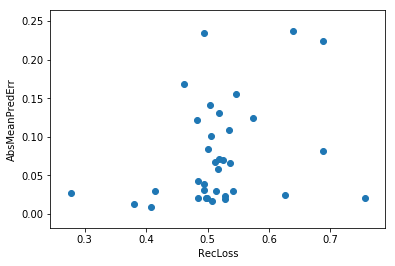

In [16]:
rl = MergeDF["RecLoss"]
plt.scatter(rl,absmerr)
plt.xlabel("RecLoss")
plt.ylabel("AbsMeanPredErr")
plt.show()

In [17]:
MergeDF.sort_values(by="AbsMeanErr",ascending=False)["name"][0]

'00012053_004.png'

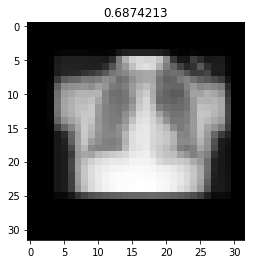

In [18]:
sind = np.argsort(AllRecL)[::-1]
#sind = np.argsort(AllRecL)
plt.imshow(AllX[sind[0]][0],cmap="gray")
plt.title(AllRecL[sind[2]])
plt.show()

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


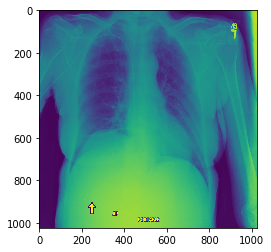

In [125]:
ptf = "./ChestXray-NIHCC-2/images/"+AllPath[sind[2]]
ptf = "./ChestXray-NIHCC-2/images/"+MergeDF.sort_values(by="AbsMeanErr",ascending=False)["name"][0]
plt.imshow(misc.imread(ptf))
plt.show()

In [106]:
isize = 32
inputsize = [isize,isize]
data_transforms = transforms.Compose([
  transforms.ToPILImage(),
  transforms.RandomAffine([-10, 10], translate=[0.5,0.5],fillcolor=0),
  transforms.Resize(inputsize),
  transforms.ToTensor(),
])

In [107]:
AllIM = torch.tensor([])
RandomEx = 100
for i in range(RandomEx):
    im = misc.imread(ptf)
    if len(im.shape) > 2:
        im = im[:, :, 0]
    #Add color chanel
    im = im[:,:,None]
    #torchvision.transforms.functional.crop(img, i, j, h, w)
    #print(im.shape)
    im = data_transforms(im)
    AllIM = torch.cat((AllIM, im), 0) 

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [108]:
AllIM = AllIM.reshape(RandomEx,1,32,32)

In [109]:
Rl = RecLoss(GenX,GenZ,AllIM*2.0-1.0)

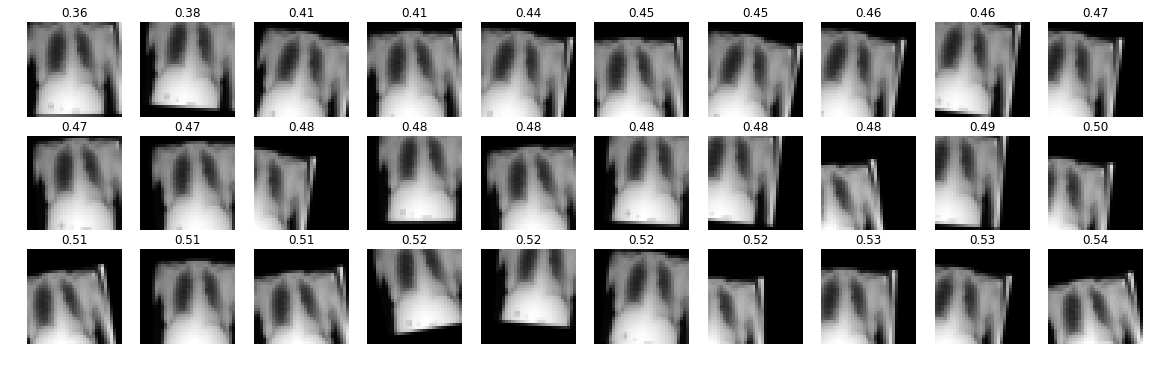

In [110]:
sind = np.argsort(Rl)
c = 0
fig = plt.figure(figsize=(20,8))
for i in sind[:30]:
    c += 1
    plt.subplot(4,10,c)
    plt.imshow(AllIM[i].detach().numpy()[0],cmap="gray")
    plt.title("%.2f" % (Rl[i]))
    plt.axis("off")
plt.show()

In [137]:
im = misc.imread(ptf)
if len(im.shape) > 2:
    im = im[:, :, 0]
#Add color chanel
im = im[:,:,None]
#torchvision.transforms.functional.crop(img, i, j, h, w)
#print(im.shape)
pim = transforms.functional.to_pil_image(im)

AllIM = torch.tensor([])
TransStep = 10
#Apply translation
AllTransf = []
AllRL = []
Rl = []
AllSc = (np.arange(10))/10.0 + 0.5
#AllSc = (np.arange(10))/5.0 + 1
AllSc = [0.9,1.0,1.1]
AllRot = [0]
AllTIM = []
for itx in range(TransStep):
    sitx = (im.shape[0]-im.shape[0]/2)/TransStep*2*float(itx-TransStep/2)
    for ity in range(TransStep):
        sity = (im.shape[1]-im.shape[1]/2)/TransStep*2*float(ity-TransStep/2)
        for sc in AllSc:
            for rot in AllRot:
                tim = transforms.functional.affine(pim,angle=rot, translate=[sitx,sity], 
                                                   scale=sc, shear=0, resample=0, fillcolor=0)
                
                reim = transforms.functional.resize(tim,inputsize)
                AllTIM.append(reim)
                tim = transforms.functional.to_tensor(reim)
                tim = tim.reshape(1,1,32,32)
                AllIM = torch.cat((AllIM, transforms.functional.to_tensor(reim)), 0)
                rl = RecLoss(GenX,GenZ,tim*2.0-1.0)
                Rl += rl
                AllTransf.append([sity,sitx,sc,rot,rl[0]])
AllIM = AllIM.reshape(len(AllIM),1,32,32)

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


In [138]:
AllTransf[sind[0]]

[-204.8, 102.4, 1.0, 0, 0.52676505]

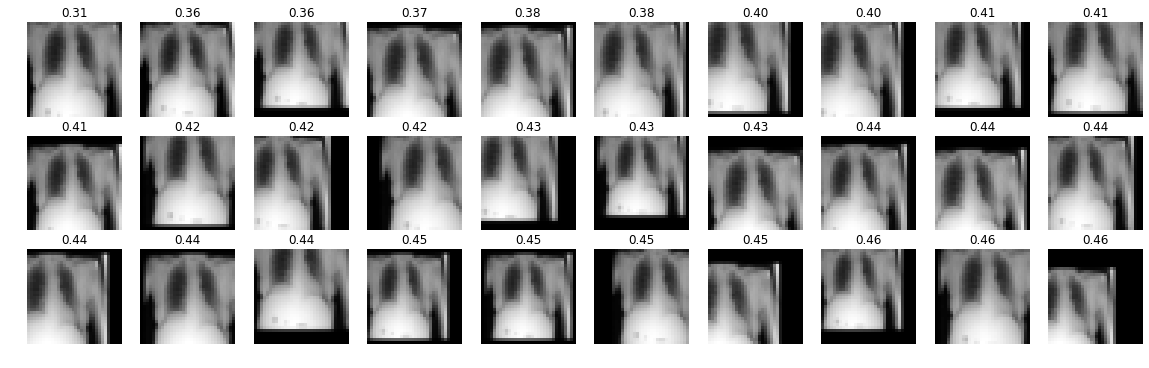

In [139]:
#Rl = RecLoss(GenX,GenZ,AllIM*2.0-1.0)
sind = np.argsort(Rl)
c = 0
fig = plt.figure(figsize=(20,8))
for i in sind[:30]:
    c += 1
    plt.subplot(4,10,c)
    plt.imshow(AllIM[i].detach().numpy()[0],cmap="gray")
    plt.title("%.2f" % (Rl[i]))
    plt.axis("off")
plt.show()

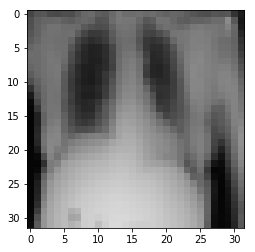

In [140]:
plt.imshow(AllTIM[sind[0]])

In [141]:
DF = pd.DataFrame(AllTransf)

In [142]:
import seaborn as sns

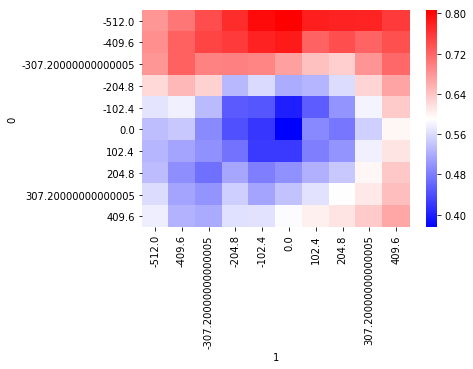

In [143]:
sns.heatmap(pd.pivot_table(DF,4,0,1),cmap="bwr")

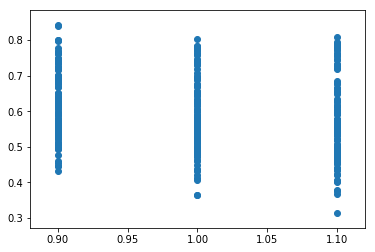

In [144]:
plt.scatter(DF[2],DF[4])

In [126]:
def Obj(ar):
    tx = ar[0]
    ty = ar[1]
    rot = ar[2]
    sc = ar[3]
    tim = transforms.functional.affine(pim,angle=rot, translate=[tx,ty], 
                                                   scale=1, shear=0, resample=0, fillcolor=0)
    
    
    data_transforms = transforms.Compose([transforms.CenterCrop(sc)])
    tim = data_transforms(tim)
    reim = transforms.functional.resize(tim,inputsize)
    tim = transforms.functional.to_tensor(reim)
    tim = tim.reshape(1,1,32,32)
    rl = RecLoss(GenX,GenZ,tim*2.0-1.0)
    return(rl[0])
Obj([0,0,0,1024])

0.3644347

In [127]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

space  = [Integer(-500, 500, name='tx'),
          Integer(-500, 500, name='ty'),
          Real(-25,25, name='rot'),
          Integer(800, 1024, name='sc'),
          ]

In [128]:
N=50
res = gp_minimize(Obj, space,n_calls=N,x0=[0,0,0,1024])
#res = gp_minimize(Obj, space,n_calls=N)

/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


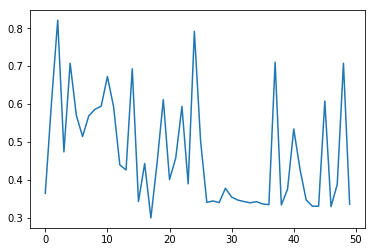

In [129]:
plt.plot(range(N),res.func_vals)

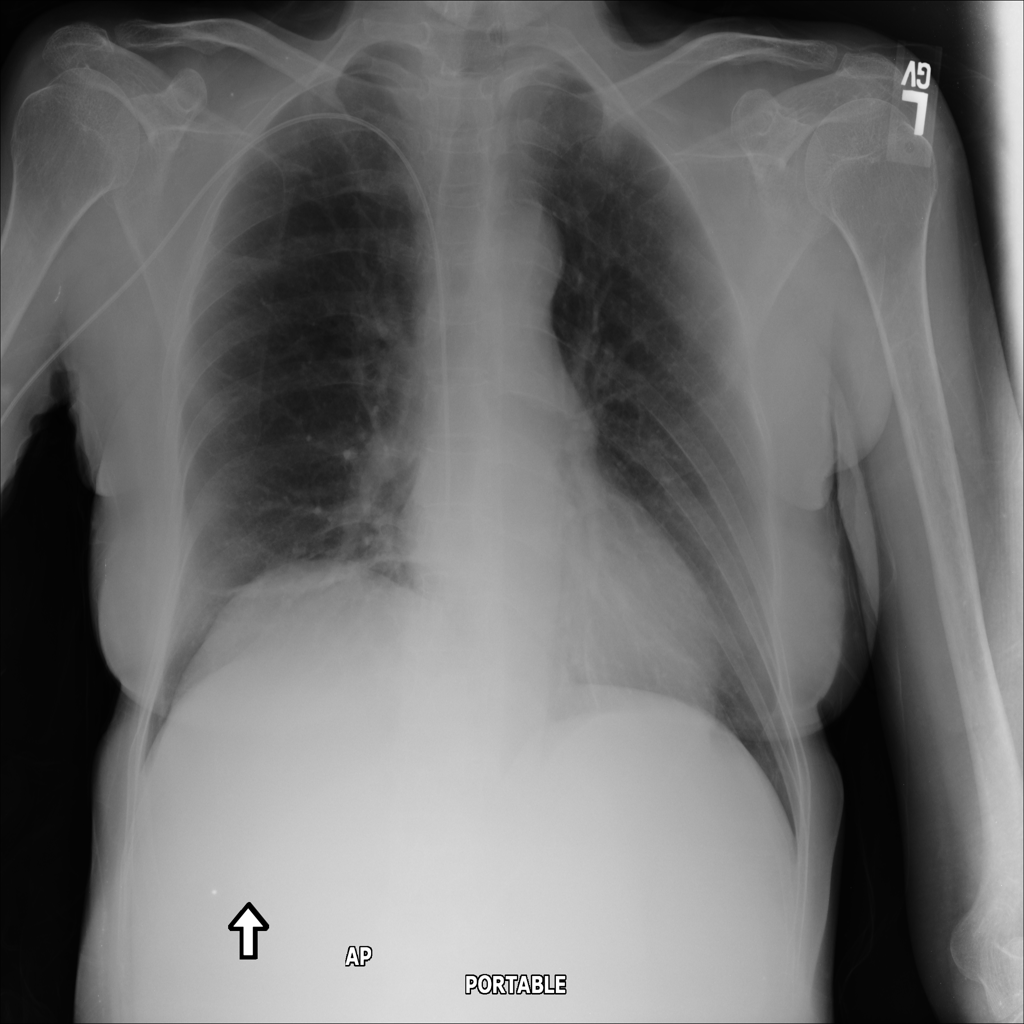

In [130]:
def print_im(ar):
    tx = ar[0]
    ty = ar[1]
    rot = ar[2]
    sc = ar[3]
    tim = transforms.functional.affine(pim,angle=rot, translate=[tx,ty], 
                                                   scale=1, shear=0, resample=0, fillcolor=0)
    
    
    data_transforms = transforms.Compose([transforms.CenterCrop(sc)])
    tim = data_transforms(tim)
    
    return(tim)
print_im([0,0,0,1024])

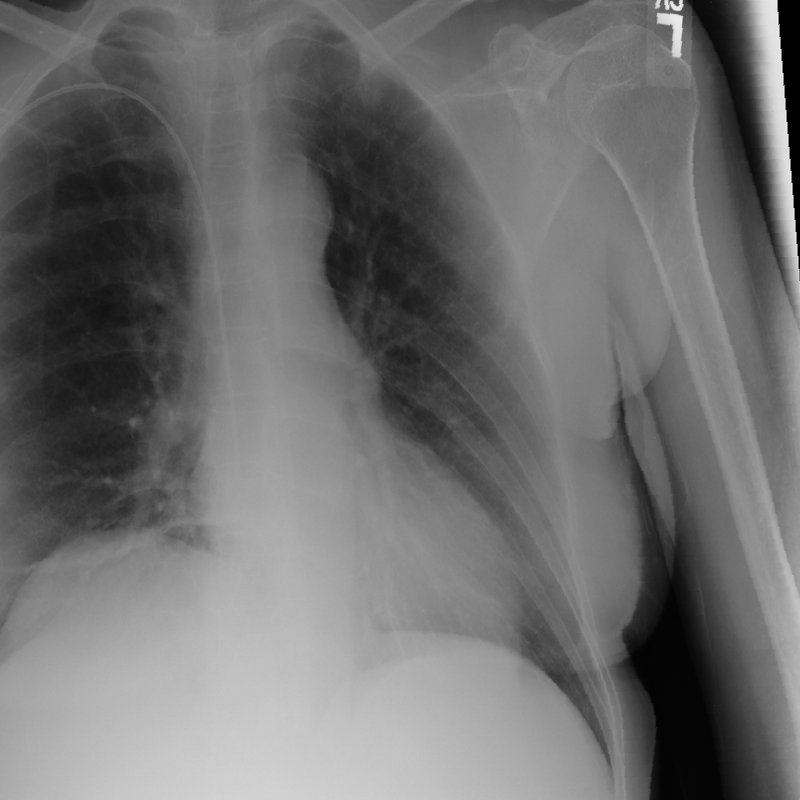

In [131]:
print_im(res.x)

In [132]:
res.x_iters

[[0, 0, 0, 1024],
 [88, -325, -11.820042163674641, 986],
 [-106, -478, -16.14628351602387, 1021],
 [122, 109, 9.05972677193924, 965],
 [-302, -478, 11.262945633806112, 896],
 [271, -232, 4.898520144314862, 804],
 [80, -220, 7.996872039236813, 979],
 [-74, -247, -7.406719471727001, 875],
 [-386, -194, 13.856317605131693, 965],
 [290, 354, 21.74664747059932, 952],
 [357, 418, -13.973752341632832, 1023],
 [500, -10, -25.0, 800],
 [-108, 40, 21.577956376558035, 986],
 [-17, -13, -25.0, 1019],
 [500, -33, 25.0, 1024],
 [-53, 17, -2.8159508809392513, 800],
 [-310, 264, -11.178801798743077, 946],
 [-98, 66, -4.68387588391138, 800],
 [-84, 172, -8.564937195536544, 1024],
 [-500, 500, 11.414696481907782, 800],
 [-103, 146, -25.0, 800],
 [-301, 56, -11.875319355492566, 800],
 [-74, 500, 19.280438009065712, 800],
 [38, 5, 22.48892171840408, 800],
 [500, -500, -15.793115197713304, 808],
 [-500, 125, 6.561916365902636, 800],
 [23, 95, -21.365775303071004, 800],
 [1, 4, -1.4882982634516146, 800],
 [

In [134]:
res

          fun: 0.2997212
    func_vals: array([0.3644347 , 0.60467786, 0.8210434 , 0.47382155, 0.70769376,
       0.5702245 , 0.51438266, 0.5688828 , 0.5861872 , 0.59446186,
       0.6725536 , 0.59258497, 0.43943766, 0.4262867 , 0.693144  ,
       0.34300184, 0.4431731 , 0.2997212 , 0.4451257 , 0.6118725 ,
       0.40106288, 0.45778987, 0.59376657, 0.3895794 , 0.79185903,
       0.5030359 , 0.34086984, 0.34436896, 0.34020805, 0.3780071 ,
       0.35461807, 0.3467225 , 0.3427665 , 0.33958244, 0.34264198,
       0.33640927, 0.33481234, 0.7105102 , 0.33396393, 0.37548363,
       0.53423876, 0.42866048, 0.34713155, 0.33059472, 0.33059472,
       0.6079262 , 0.3293436 , 0.3879381 , 0.70765597, 0.33572808],
      dtype=float32)
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer=